<a href="https://colab.research.google.com/github/AnkushChauhan764/Python-assignments/blob/master/Multivariate%20Regresson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget archive.ics.uci.edu/ml/machine-learning-databases/00203/YearPredictionMSD.txt.zip
!unzip YearPredictionMSD.txt.zip

In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

FILE = '/content/YearPredictionMSD.txt'
data =  pd.read_table('YearPredictionMSD.txt',sep = ',')
data.corr()



,2001,49.94357,21.47114,73.07750,8.74861,-17.40628,-13.09905,-25.01202,-12.23257,7.83089,-2.46783,3.32136,-2.31521,10.20556,611.10913,951.08960,698.11428,408.98485,383.70912,326.51512,238.11327,251.42414,187.17351,100.42652,179.19498,-8.41558,-317.87038,95.86266,48.10259,-95.66303,-18.06215,1.96984,34.42438,11.72670,1.36790,7.79444,-0.36994,-133.67852,-83.26165,-37.29765,...,-25.38187,-3.90772,13.29258,41.55060,-7.26272,-21.00863,105.50848,64.29856,26.08481,-44.59110,-8.30657,7.93706,-10.73660,-95.44766,-82.03307,-35.59194,4.69525,70.95626,28.09139,6.02015,-37.13767,-41.12450,-8.40816,7.19877,-8.60176,-5.90857,-12.32437,14.68734,-54.32125,40.14786,13.01620,-54.40548,58.99367,15.37344,1.11144,-23.08793,68.40795,-1.82223,-27.46348,2.26327
2001,1.000000,0.220851,0.078961,-0.150806,0.007048,0.122478,-0.302812,0.077461,-0.111404,0.013259,0.065909,0.103163,-0.039418,-0.047856,0.094953,-0.053519,-0.016763,0.067509,-0.045666,0.022721,0.086832,-0.021442,0.038859,-0.014787,-0.057552,-0.003145,-0.089632,0.025664,0.025937,0.044345,-0.106565,-0.036867,-0.020395,-0.009580,0.021251,0.035581,-0.177956,0.023791,0.154621,0.143596,...,-0.017847,-0.055233,0.120502,-0.060127,0.050749,0.051155,-0.136568,0.008824,-0.063493,-0.107784,-0.099579,-0.064950,-0.086988,0.055832,-0.054483,-0.093255,-0.198132,0.126045,-0.134428,0.028738,-0.040417,-0.066099,0.166641,0.101673,0.028831,-0.017921,-0.057198,-0.087817,0.117177,-0.031518,-0.084785,-0.087458,-0.021169,-0.004550,0.077794,-0.030386,0.027785,-0.038439,0.017615,-0.086900
49.94357,0.220851,1.000000,0.609830,0.235479,-0.075899,-0.140733,-0.332066,0.140842,-0.023006,0.102609,0.033784,0.084834,-0.136917,-0.304891,-0.389381,-0.444797,-0.389873,-0.376348,-0.336407,-0.414705,-0.276224,-0.478605,-0.248256,-0.271319,-0.436013,0.017459,-0.272593,-0.122749,0.107274,0.130034,-0.137249,-0.207617,0.175626,-0.142990,-0.105515,0.037557,-0.388304,-0.242532,0.081760,0.006920,...,-0.216098,0.004879,0.154324,-0.071030,0.270638,-0.345580,-0.184989,-0.046394,-0.097195,-0.070743,-0.099510,0.052017,-0.541927,0.109496,-0.018351,-0.060590,-0.109821,0.007194,-0.158270,0.099427,0.275121,-0.141622,0.075481,-0.046700,0.060613,0.259848,-0.315072,0.043095,0.151559,0.068098,-0.449819,0.176621,-0.135596,-0.105484,0.188023,0.034332,0.020199,-0.153645,-0.100662,-0.256934
21.47114,0.078961,0.609830,1.000000,0.041490,0.041966,-0.047529,-0.194437,0.097868,0.057601,0.049668,0.257464,-0.029614,0.011190,-0.078748,-0.232439,-0.206542,-0.117364,-0.192677,-0.113493,-0.220720,-0.050160,-0.384113,-0.044763,-0.029898,-0.321858,-0.125712,-0.175812,-0.181637,0.153720,0.235409,-0.009465,-0.193602,0.258708,-0.142348,0.027265,-0.066473,-0.319842,-0.111943,0.249409,-0.038608,...,-0.214829,0.058559,0.171385,-0.125896,0.227240,-0.263403,-0.125221,0.074919,-0.034610,0.041651,-0.042464,-0.006090,-0.447420,0.115364,-0.096729,-0.128750,-0.105089,0.065479,-0.178406,0.100155,0.148269,-0.200092,0.046099,-0.018428,-0.002579,0.289184,-0.313075,-0.014465,0.064824,0.067396,-0.353777,0.107422,-0.099751,-0.082765,0.214599,0.036316,-0.021367,-0.026297,-0.117232,-0.251973
73.07750,-0.150806,0.235479,0.041490,1.000000,0.073347,-0.210369,0.144068,0.023089,0.217482,0.020607,-0.022989,-0.111289,-0.101857,-0.115984,-0.324304,-0.204980,-0.287710,-0.213175,-0.356152,-0.187002,-0.428583,-0.052967,-0.388858,-0.228150,-0.063108,-0.094384,0.018828,0.119266,0.176503,-0.097158,-0.223126,0.086745,-0.165119,0.152424,-0.051462,0.107015,-0.158591,-0.122942,-0.052514,-0.134597,...,-0.189492,0.173867,-0.125321,0.180893,-0.075769,-0.217684,-0.157522,0.019028,-0.130477,0.219738,-0.050367,0.039445,-0.188883,0.072607,-0.060760,0.135009,0.204530,-0.327415,0.072894,-0.016428,0.051085,0.200522,-0.248711,-0.092336,0.152628,0.088111,-0.029596,0.066434,-0.121015,0.134687,0.054242,0.202273,0.075379,-0.013163,0.010275,-0.127758,0.055415,-0.169429,-0.098985,0.035286
8.74861,0.007048,-0.075899,0.041966,0.073347,1.000000,0.131498,0.292501,0.279541,-0.040289,-0.091507,0.134402,0.361491,-0.037194,0.059772,0.

In [ ]:
data.corr().abs().sort_values(by='2001',axis=1,ascending=False)

,2001,-13.09905,49.94357,4.69525,-0.36994,-8.40816,-83.26165,73.07750,-37.29765,105.50848,28.09139,70.95626,-17.40628,13.29258,31.58431,-54.32125,-12.23257,-37.36684,-44.59110,-18.06215,73.04667,3.32136,7.19877,-8.30657,82.15479,611.10913,-35.59194,-317.87038,14.68734,-54.40548,-10.73660,2.26327,238.11327,13.01620,240.57980,21.47114,1.11144,-25.01202,-18.60478,408.98485,...,951.08960,-13.23066,-21.00863,-7.26272,10.20556,383.70912,-95.66303,-37.13767,-2.31521,187.17351,-1.82223,-3.13853,1.96984,7.79444,40.14786,-23.08793,-8.60176,6.02015,68.40795,48.10259,95.86266,-133.67852,326.51512,251.42414,1.36790,58.99367,34.42438,-5.90857,-25.38187,-27.46348,698.11428,15.93809,-24.21531,100.42652,7.83089,11.72670,64.29856,8.74861,15.37344,-8.41558
2001,1.000000,0.302812,0.220851,0.198132,0.177956,0.166641,0.154621,0.150806,0.143596,0.136568,0.134428,0.126045,0.122478,0.120502,0.118492,0.117177,0.111404,0.110239,0.107784,0.106565,0.106358,0.103163,0.101673,0.099579,0.096076,0.094953,0.093255,0.089632,0.087817,0.087458,0.086988,0.086900,0.086832,0.084785,0.083865,0.078961,0.077794,0.077461,0.076514,0.067509,...,0.053519,0.052026,0.051155,0.050749,0.047856,0.045666,0.044345,0.040417,0.039418,0.038859,0.038439,0.038055,0.036867,0.035581,0.031518,0.030386,0.028831,0.028738,0.027785,0.025937,0.025664,0.023791,0.022721,0.021442,0.021251,0.021169,0.020395,0.017921,0.017847,0.017615,0.016763,0.015334,0.014816,0.014787,0.013259,0.009580,0.008824,0.007048,0.004550,0.003145
49.94357,0.220851,0.332066,1.000000,0.109821,0.388304,0.075481,0.081760,0.235479,0.006920,0.184989,0.158270,0.007194,0.140733,0.154324,0.071463,0.151559,0.023006,0.003343,0.070743,0.137249,0.133577,0.084834,0.046700,0.099510,0.214424,0.389381,0.060590,0.272593,0.043095,0.176621,0.541927,0.256934,0.276224,0.449819,0.341154,0.609830,0.188023,0.140842,0.359365,0.376348,...,0.444797,0.151058,0.345580,0.270638,0.304891,0.336407,0.130034,0.275121,0.136917,0.248256,0.153645,0.289853,0.207617,0.037557,0.068098,0.034332,0.060613,0.099427,0.020199,0.107274,0.122749,0.242532,0.414705,0.478605,0.105515,0.135596,0.175626,0.259848,0.216098,0.100662,0.389873,0.053908,0.005245,0.271319,0.102609,0.142990,0.046394,0.075899,0.105484,0.017459
21.47114,0.078961,0.194437,0.609830,0.105089,0.319842,0.046099,0.249409,0.041490,0.038608,0.125221,0.178406,0.065479,0.047529,0.171385,0.055075,0.064824,0.057601,0.034170,0.041651,0.009465,0.191907,0.029614,0.018428,0.042464,0.200388,0.232439,0.128750,0.175812,0.014465,0.107422,0.447420,0.251973,0.050160,0.353777,0.249297,1.000000,0.214599,0.097868,0.371596,0.192677,...,0.206542,0.094524,0.263403,0.227240,0.078748,0.113493,0.235409,0.148269,0.011190,0.044763,0.026297,0.277907,0.193602,0.066473,0.067396,0.036316,0.002579,0.100155,0.021367,0.153720,0.181637,0.111943,0.220720,0.384113,0.027265,0.099751,0.258708,0.289184,0.214829,0.117232,0.117364,0.052795,0.050676,0.029898,0.049668,0.142348,0.074919,0.041966,0.082765,0.125712
73.07750,0.150806,0.144068,0.235479,0.204530,0.158591,0.248711,0.052514,1.000000,0.134597,0.157522,0.072894,0.327415,0.210369,0.125321,0.219545,0.121015,0.217482,0.091512,0.219738,0.223126,0.092753,0.111289,0.092336,0.050367,0.011699,0.324304,0.135009,0.018828,0.066434,0.202273,0.188883,0.035286,0.428583,0.054242,0.074884,0.041490,0.010275,0.023089,0.083036,0.213175,...,0.204980,0.071100,0.217684,0.075769,0.115984,0.356152,0.097158,0.051085,0.101857,0.388858,0.169429,0.036269,0.086745,0.107015,0.134687,0.127758,0.152628,0.016428,0.055415,0.176503,0.119266,0.122942,0.187002,0.052967,0.051462,0.075379,0.165119,0.088111,0.189492,0.098985,0.287710,0.013819,0.007305,0.228150,0.020607,0.152424,0.019028,0.073347,0.013163,0.094384
8.74861,0.007048,0.292501,0.075899,0.212872,0.044907,0.163469,0.189746,0.073347,0.010583,0.013729,0.097220,0.476848,0.131498,0.012526,0.262763,0.020961,0.040289,0.217725,0.098443,0.361961,0.142360,0.361491,0.146593,0.183007,0.095754,0.247220,0.159232,0.063578,0.270275,0.143297,0.015242,0.028223,0.387200,0.036500,0.004799,0

In [ ]:
x = data[['49.94357','73.07750','-13.09905','4.69525','-25.01202','238.11327']]
y_a = data[['2001']]
x.shape

(2407, 6)

In [ ]:

x = data[['49.94357','73.07750','-13.09905','4.69525','-25.01202','238.11327']]
y_a = data[['2001']]
m =[2,4,5,7,8,9]
c= 10

def line(m,x,c):
  return np.array(np.dot(x,m)+c).reshape(2407,1)
   
def error(m,x,c,y_a):
  y_p = line(m,x,c)
  return float(np.mean((y_p-y_a)**2))

def derivative_m(m,x,c,y_a):
  y_p = line(m,x,c)
  C = np.array((y_p-y_a)).reshape(2407,1)
  return 2*np.array(np.mean(np.multiply(C,x),axis = 0))

def derivative_c(m,x,c,y_a):
  y_p = line(m,x,c)
  C = np.array((y_p-y_a)).reshape(2407,1)
  return 2*np.array(np.mean(C))

derivative_c(m,x,c,y_a)

5338.540304977149

Ended due to iterations
Final Error:  13954759.375390634 Iter #:  2000
Final Parameters:  m:  [ 2.83127989  2.84742491  3.95797249 -0.1145541   7.57767617  0.13369055] c:  1816.5356676564961


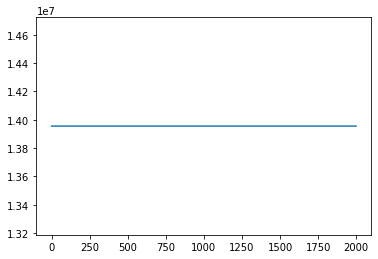

In [ ]:
m_r=[2,4,5,7,8,9]
c_r= 10
lr_m = 0.0000001
lr_c = 0.01
i = 0
er_list = []
while(True):
  er = error(m,x,c,y_a)
  er_list.append(er)
  m_r = m_r-lr_m*derivative_m(m_r,x,c_r,y_a)
  c_r = c_r-lr_c*derivative_c(m_r,x,c_r,y_a)
  i+=1
  if(i>=2000):
    print('Ended due to iterations')
    break
  if(er<=100):
    print('Ended due to error')
    break  
print('Final Error: ',er,'Iter #: ',i)
print('Final Parameters: ','M: ',m_r,'C: ',c_r)
plt.plot(er_list)  
